In [1]:
#!pip install keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
DATA = './adult.data'

In [4]:
data_train = pd.read_csv(DATA)

data_train.columns = ['age','workclass','fnlwgt','education','education-num','martial-status','occupation','relationship',
                      'race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']
data_train

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data_train = data_train[(data_train.astype(str) != '?').all(axis=1)]

In [6]:
x = data_train.drop('hours-per-week',axis = 1)
y = data_train['hours-per-week']

x

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,United-States,<=50K


In [7]:
onehot_c = ['workclass','education','martial-status','occupation','relationship','race','sex','native-country','salary']

In [8]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

for i in x.columns:
    if i in onehot_c:
        temp = x[i].values.reshape(-1, 1).tolist()
        encoder = OneHotEncoder()
        temp_array = encoder.fit_transform(temp).toarray()
        data_hot_encoded = pd.DataFrame(temp_array, index=x.index)

        #Extract only the columns that didnt need to be encoded
        data_other_cols = x.drop(i,axis = 1)

        #Concatenate the two dataframes : 
        x = pd.concat([data_hot_encoded, data_other_cols], axis=1)
x

,0,1,0,1,2,3,4,5,6,7,...,4,5,6,7,8,age,fnlwgt,education-num,capital-gain,capital-loss
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,50,83311,13,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,38,215646,9,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,53,234721,7,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,28,338409,13,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,37,284582,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,27,257302,12,0,0
32556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,40,154374,9,0,0
32557,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,58,151910,9,0,0
32558,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,22,201490,9,0,0


In [9]:
scaler = MinMaxScaler().fit(x)

x = scaler.transform(x)

print(x)
print(x.shape)

[[1.         0.         0.         ... 0.8        0.         0.        ]
 [1.         0.         0.         ... 0.53333333 0.         0.        ]
 [1.         0.         0.         ... 0.4        0.         0.        ]
 ...
 [1.         0.         0.         ... 0.53333333 0.         0.        ]
 [1.         0.         0.         ... 0.53333333 0.         0.        ]
 [0.         1.         0.         ... 0.53333333 0.1502415  0.        ]]
(32560, 109)


In [10]:
DATA = './adult.test'

In [11]:
data_test = pd.read_csv(DATA)

In [12]:
data_test.columns = ['age','workclass','fnlwgt','education','education-num','martial-status','occupation','relationship','race',
            'sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

data_test = data_test[(data_test.astype(str) != ' ?').all(axis=1)]
data_test

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [13]:
a = data_test.drop('hours-per-week',axis = 1)
b = data_test['hours-per-week']
a

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,salary
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,United-States,>50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,United-States,<=50K.
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,United-States,<=50K.


In [14]:
for i in a.columns:
    if i in onehot_c:
        temp = a[i].values.reshape(-1, 1).tolist()
        temp_array = encoder.fit_transform(temp).toarray()
        data_hot_encoded = pd.DataFrame(temp_array, index=a.index)

        #Extract only the columns that didnt need to be encoded
        data_other_cols = a.drop(i,axis = 1)

        #Concatenate the two dataframes : 
        a = pd.concat([data_hot_encoded, data_other_cols], axis=1)

for i in range(5):        
        a.insert(94+i,column=94+i, value=0)

In [15]:
#print(a.shape)
#print(b.shape)
a

,0,1,0,1,2,3,4,5,6,7,...,2,3,4,5,6,age,fnlwgt,education-num,capital-gain,capital-loss
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,38,89814,9,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,28,336951,12,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,44,160323,10,7688,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,34,198693,6,0,0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,63,104626,15,3103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,33,245211,13,0,0
16275,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,39,215419,13,0,0
16277,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,38,374983,13,0,0
16278,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,44,83891,13,5455,0


In [16]:
scaler = MinMaxScaler().fit(a)

a = scaler.transform(a)

a

array([[1.        , 0.        , 0.        , ..., 0.53333333, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.73333333, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.6       , 0.07688077,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.8       , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.8       , 0.05455055,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.8       , 0.        ,
        0.        ]])

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import backend as K
"""建立前饋神經網路"""

model = Sequential()
model.add(Dense(128, input_shape=(x.shape[1],), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, kernel_initializer="uniform",activation='linear'))

#model.build([None,x_train.shape[1]])
print(model.summary())

def mean_absolute_error(y_true, y_pred):
        return K.mean(K.square(y_pred - y_true), axis=-1)

#model_num.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mae', optimizer=keras.optimizers.Adam(lr=0.001), metrics=[mean_absolute_error])
es = EarlyStopping(monitor='val_mean_absolute_error', patience=10, mode='auto', verbose=1)

train_history = model.fit(x=x, y=y, epochs=1000, validation_split = 0.33, batch_size=128, callbacks=[es], verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               14080     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 24,961
Trainable params: 24,961
Non-traina

F:\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


171/171 - 2s - loss: 17.5886 - mean_absolute_error: 593.0328 - val_loss: 7.5465 - val_mean_absolute_error: 134.2746 - 2s/epoch - 10ms/step
Epoch 2/1000
171/171 - 1s - loss: 7.8047 - mean_absolute_error: 133.8943 - val_loss: 7.5702 - val_mean_absolute_error: 133.7829 - 578ms/epoch - 3ms/step
Epoch 3/1000
171/171 - 1s - loss: 7.7099 - mean_absolute_error: 130.8855 - val_loss: 7.7192 - val_mean_absolute_error: 135.6451 - 551ms/epoch - 3ms/step
Epoch 4/1000
171/171 - 1s - loss: 7.6014 - mean_absolute_error: 129.4214 - val_loss: 7.4383 - val_mean_absolute_error: 129.9866 - 525ms/epoch - 3ms/step
Epoch 5/1000
171/171 - 1s - loss: 7.4861 - mean_absolute_error: 126.5457 - val_loss: 7.5298 - val_mean_absolute_error: 130.8315 - 539ms/epoch - 3ms/step
Epoch 6/1000
171/171 - 1s - loss: 7.4211 - mean_absolute_error: 124.7661 - val_loss: 7.6016 - val_mean_absolute_error: 129.5195 - 520ms/epoch - 3ms/step
Epoch 7/1000
171/171 - 1s - loss: 7.3320 - mean_absolute_error: 123.0924 - val_loss: 7.5333 - va

In [18]:
def show_train_history(train_history,train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['test_mae', 'test_loss'], loc='upper left')
    plt.show()

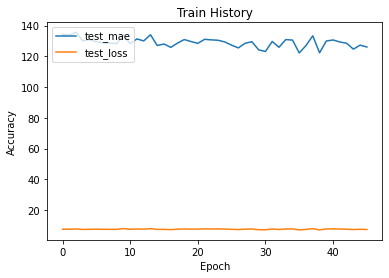

In [19]:
show_train_history(train_history,'val_mean_absolute_error','val_loss')

In [20]:
score = model.evaluate(a, b)

471/471 [==============================] - 1s 1ms/step - loss: 10.3114 - mean_absolute_error: 194.9325


In [21]:
def plot_text_labels_prediction(text,labels,prediction,idx,num=10):
    if num>25: num=25 
    for i in range(0, num):
        print("label=" +str(labels[idx])+
              ",predict="+str(prediction[idx])) 
        print("==============================")
        
        idx+=1
        if idx >= len(text):
            break
    plt.show()

In [22]:
prediction=model.predict(a)

prediction = prediction.astype(int)
#print(prediction)

plot_text_labels_prediction(a,b.values,prediction,idx=0)

label=50,predict=[52]
label=40,predict=[62]
label=40,predict=[57]
label=30,predict=[45]
label=32,predict=[53]
label=40,predict=[42]
label=10,predict=[43]
label=40,predict=[55]
label=40,predict=[53]
label=39,predict=[46]


In [23]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
rmse = sqrt(mean_squared_error(b,prediction))

In [25]:
print(rmse)
print(mean_absolute_percentage_error(b,prediction))

13.797495227760137
0.39938470184522107
